In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Ruta local al dataset
folder_path = r"C:\Users\Felix\Downloads\all_images"


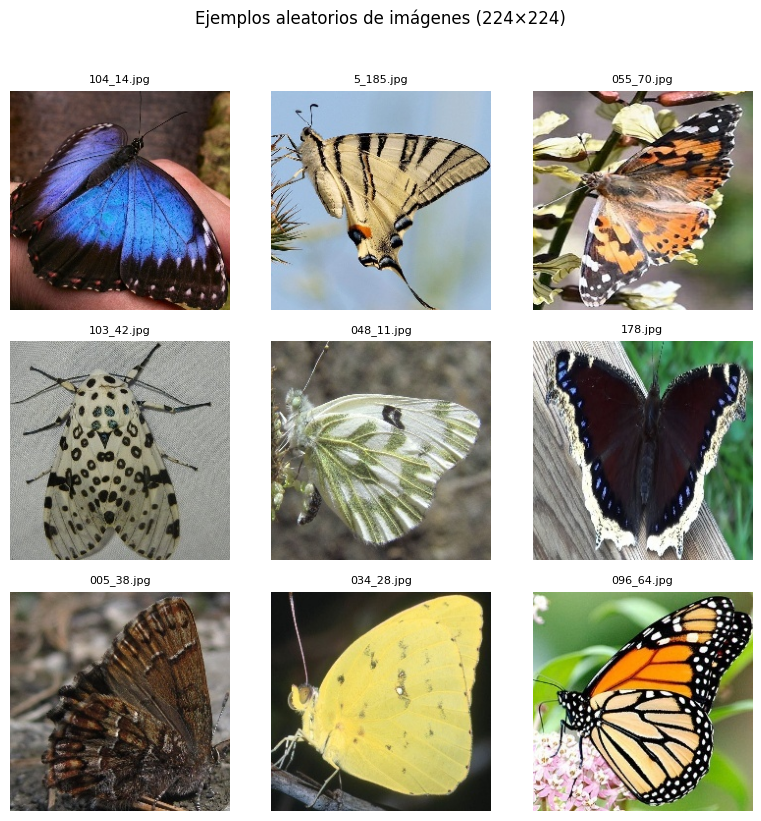

In [2]:
def mostrar_ejemplos(path, n=9, size=(224,224)):
    archivos = [f for f in os.listdir(path) if f.lower().endswith('.jpg')]
    seleccion = random.sample(archivos, n)
    plt.figure(figsize=(8,8))
    for i, fname in enumerate(seleccion, 1):
        img = Image.open(os.path.join(path, fname)).resize(size)
        plt.subplot(3,3,i)
        plt.imshow(img)
        plt.title(fname, fontsize=8)
        plt.axis('off')
    plt.suptitle('Ejemplos aleatorios de imágenes (224×224)', y=1.02)
    plt.tight_layout()
    plt.show()

mostrar_ejemplos(folder_path)


In [3]:
image_list = []
filenames = []

for fname in os.listdir(folder_path):
    if fname.lower().endswith('.jpg'):
        path = os.path.join(folder_path, fname)
        img = Image.open(path).resize((64,64))       # Reducción a 64×64
        arr = np.array(img, dtype=np.float32)        # float32 para ahorrar memoria
        flat = arr.flatten()                         # vector 1D de 64*64*3 = 12.288 características
        image_list.append(flat)
        filenames.append(fname)

# Montamos la matriz de datos
X = np.vstack(image_list)
print(f"Cargadas {X.shape[0]} imágenes → matriz X de forma {X.shape}")


Cargadas 13594 imágenes → matriz X de forma (13594, 12288)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("¡Normalización completada! X_scaled listo para clustering.")


¡Normalización completada! X_scaled listo para clustering.


K=10 → inercia=115330480
K=20 → inercia=109608432
K=30 → inercia=106370864
K=40 → inercia=104468344
K=50 → inercia=102641616
K=60 → inercia=101673328
K=70 → inercia=100534640
K=80 → inercia=99751024
K=90 → inercia=98956856
K=100 → inercia=98274048
K=110 → inercia=97661152


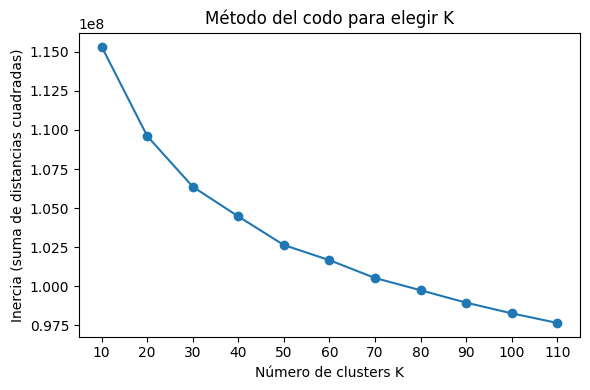

In [5]:
# Calculamos inercia para distintos valores de K
inertias = []
K_range = list(range(10, 111, 10))  # probamos de 10 en 10 hasta 110

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    print(f"K={k} → inercia={km.inertia_:.0f}")

# Graficamos
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia (suma de distancias cuadradas)')
plt.title('Método del codo para elegir K')
plt.xticks(K_range)
plt.tight_layout()
plt.show()
